In [7]:
import pandas as pd

In [8]:

master_df = pd.read_csv('master_df.csv')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA


df_electric = master_df[master_df['Fuel Type'] == 'Electric']

columns_to_drop = ['Vehicle Class', 'Vehicle Make', 'Vehicle Model', 'Fuel Type',
                   'Cylinder Capacity Of Engine (c.c.)', 'Rated Power (kW)', 'Body Type',
                   'First Registration Vehicle Status (Note)',
                   'Permitted Gross Vehicle Weight ', 'Number Of Passenger Seats ',
                   'Taxable Value (HK$)']
print(df_electric.columns)

Index(['Vehicle Class', 'Vehicle Make', 'Vehicle Model', 'Fuel Type',
       'Cylinder Capacity Of Engine (c.c.)', 'Rated Power (kW)', 'Body Type',
       'First Registration Vehicle Status (Note)',
       'Permitted Gross Vehicle Weight ', 'Number Of Passenger Seats ',
       'Taxable Value (HK$)', 'Year Of Manufacture'],
      dtype='object')


In [10]:
df_electric = pd.read_csv('master_df-1.csv')
df_electric

,Fuel Type,Count,Date
0,Diesel,614,apr2021
1,Electric,629,apr2021
2,LPG,118,apr2021
3,Petrol,3300,apr2021
4,Diesel,538,apr2022
...,...,...,...
224,Petrol,2301,sep2022
225,Diesel,353,sep2023
226,Electric,2288,sep2023
227,LPG,112,sep2023


In [11]:
df_electric = pd.read_csv('master_df-1.csv')
df_electric=df_electric[df_electric['Fuel Type']=='Electric']
df_electric.set_index('Date', inplace=True)

df_electric.index = pd.to_datetime(df_electric.index, format='%b%Y')
df_electric.sort_index(inplace=True)
df_electric.index = df_electric.index.to_period('M')
df_electric.drop(columns='Fuel Type', inplace  = True)
df_electric

,Count
Date,
2019-11,428
2019-12,394
2020-01,121
2020-02,197
2020-03,596
2020-05,156
2020-06,145
2020-07,106
2020-08,992


Current data:
Count: Date
2019-11     428
2019-12     394
2020-01     121
2020-02     197
2020-03     596
2020-05     156
2020-06     145
2020-07     106
2020-08     992
2020-09     453
2020-10      95
2020-11     789
2020-12     824
2021-01     226
2021-02     483
2021-03     571
2021-04     629
2021-05     956
2021-06     588
2021-07     901
2021-08     704
2021-09    1006
2021-10     838
2021-11    1666
2021-12    1149
2022-01     514
2022-02     897
2022-03    1847
2022-04     423
2022-05     380
2022-06    1331
2022-07    1009
2022-08    2293
2022-09    2787
2022-10    2977
2022-11    2844
2022-12    2758
2023-01    1555
2023-02    2657
2023-03    2284
2023-04    1745
2023-05    2731
2023-06    2585
2023-07    2300
2023-08    2799
2023-09    2288
2023-10    2483
2023-11    2602
2023-12    3089
2024-01    3206
2024-02    3539
2024-03    4937
2024-04    5425
2024-05    1727
2024-06    1560
2024-07    1743
2024-08    2111
Freq: M, Name: Count, dtype: int64


<Figure size 1200x600 with 0 Axes>

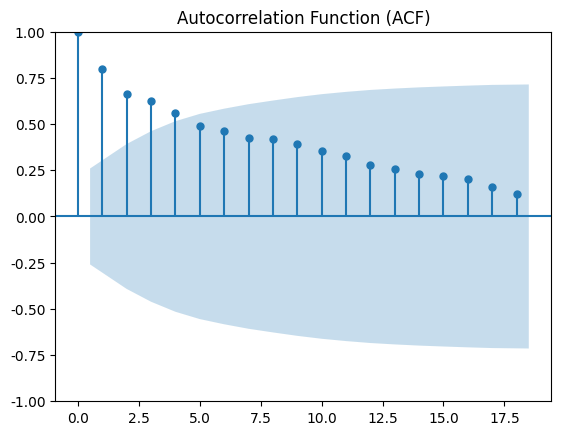

<Figure size 1200x600 with 0 Axes>

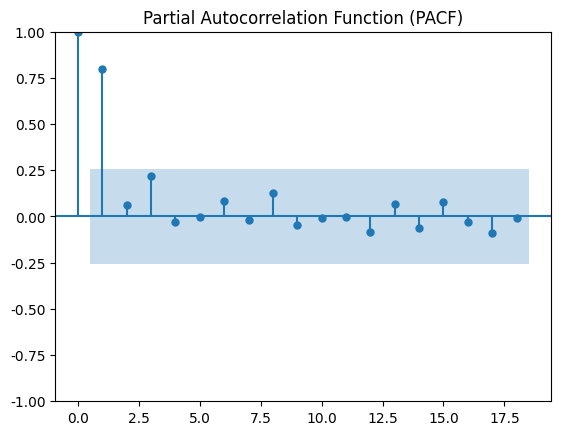

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   57
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -444.782
Date:                Mon, 21 Oct 2024   AIC                            901.564
Time:                        14:55:37   BIC                            913.716
Sample:                    11-30-2019   HQIC                           906.276
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4325      0.341      1.269      0.205      -0.236       1.101
ar.L2         -0.2364      0.217     -1.091      0.275      -0.661       0.188
ar.L3          0.1142      0.249      0.458      0.6

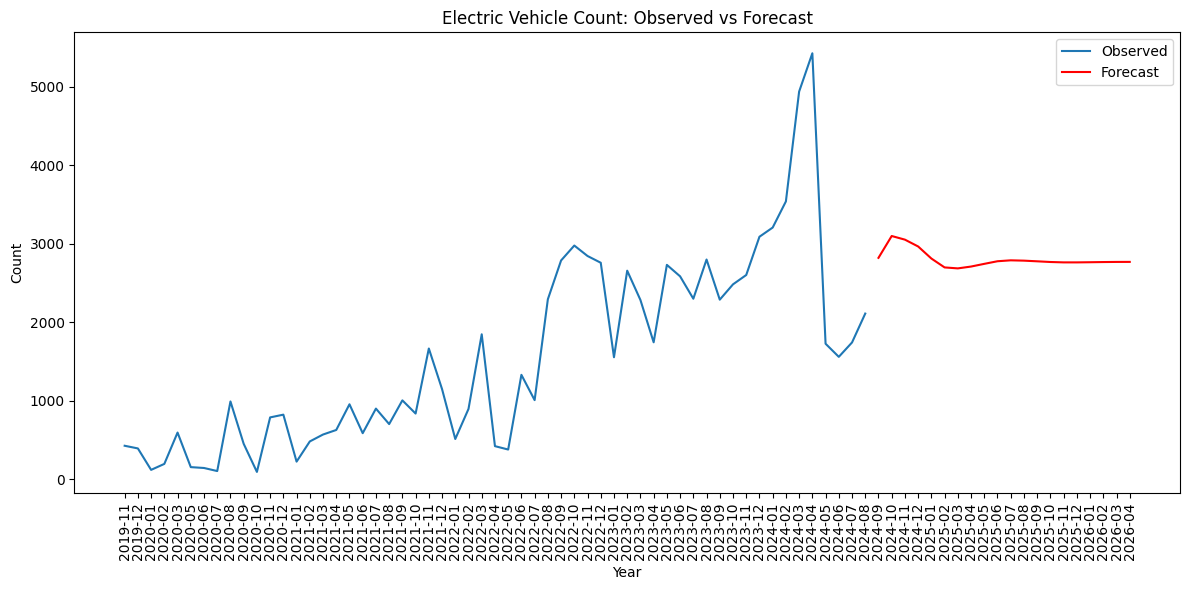


Forecast for the next 10 years:


TypeError: unsupported format string passed to Series.__format__

In [12]:




print("Current data:")
for year, count in df_electric.items():
    print(f"{year}: {count}")

plt.figure(figsize=(12, 6))
plot_acf(df_electric)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_electric, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

model = ARIMA(df_electric, order=(4,1,1))
model_fit = model.fit()


print(model_fit.summary())

forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df_electric.index.astype(str), df_electric.values, label='Observed')
forecast_index = pd.period_range(start=df_electric.index[-1] + 1, periods=forecast_steps, freq='M')
plt.plot(forecast_index.astype(str), forecast, color='red', label='Forecast')
plt.title('Electric Vehicle Count: Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nForecast for the next 10 years:")
last_observed = df_electric.iloc[-1]
for year, value in zip(forecast_index.astype(str), forecast):
    increase_percent = (value - last_observed) / last_observed * 100
    print(f"{year}: {value:.0f} (Increase: {increase_percent:.2f}%)")
    last_observed = value

total_increase_percent = (forecast[-1] - df_electric.iloc[-1]) / df_electric.iloc[-1] * 100
print(f"\nTotal increase over 10 years: {total_increase_percent:.2f}%")